## 1. Introduction to Support Vector Machine (SVM)


**Support Vector Machine (SVM)** is a powerful supervised learning algorithm used for both classification and regression tasks.
It works by finding the optimal hyperplane that best separates different classes in the feature space.

The primary objective of the SVM algorithm is to identify a hyperplane that distinguishably segregates the data points of different classes. The hyperplane is localized in such a manner that the largest margin separates the classes under consideration.


### Hyperplane
A hyperplane is a decision boundary that separates data points into different classes in a high-dimensional space

### Margin
A margin is the distance between the decision boundary (hyperplane) and the closest data points from each class. The goal of SVMs is to maximize this margin while minimizing classification errors.

### Support Vectors
They are the data points that lie closest to the decision boundary (hyperplane) in a Support Vector Machine (SVM). These data points are important because they determine the position and orientation of the hyperplane, and thus have a significant impact on the classification accuracy of the SVM. In fact, SVMs are named after these support vectors because they “support” or define the decision boundary.

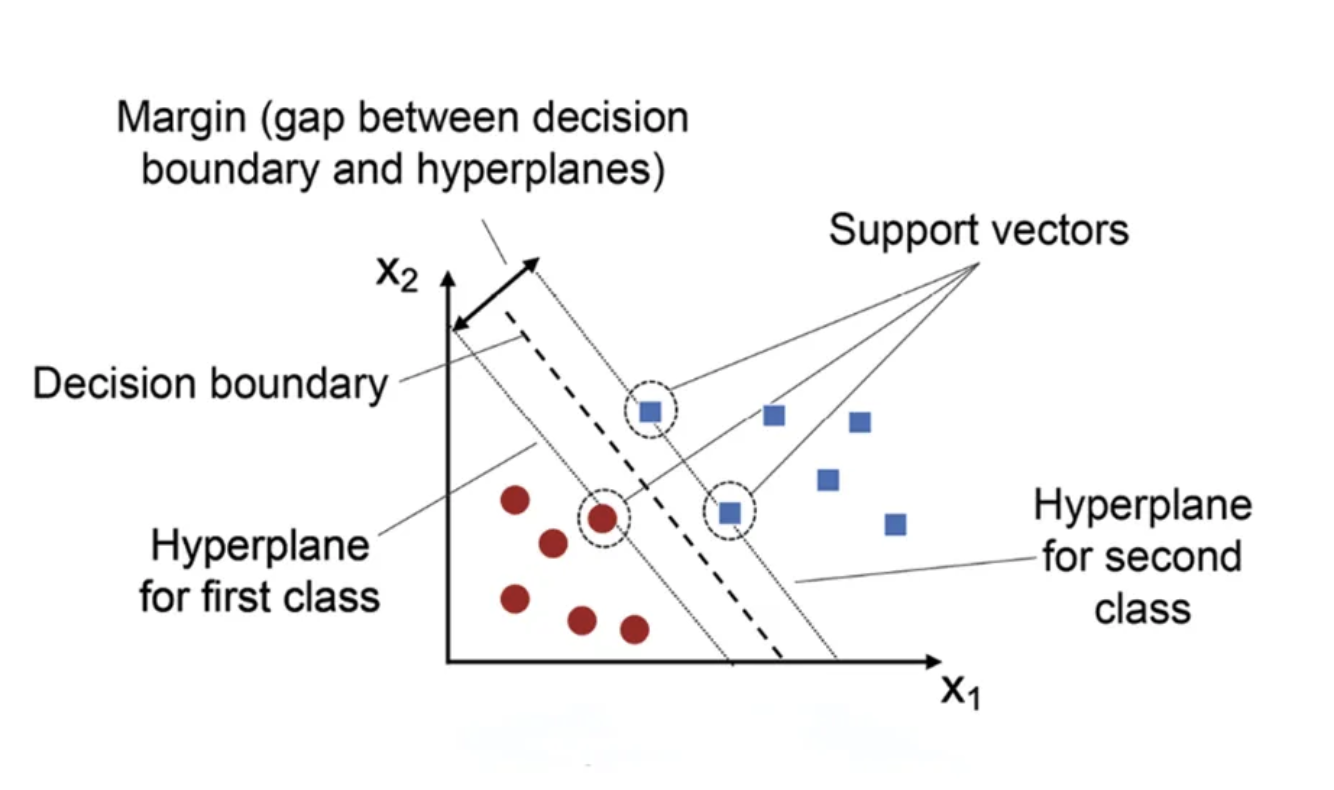

### Hard Margin vs Soft Margin

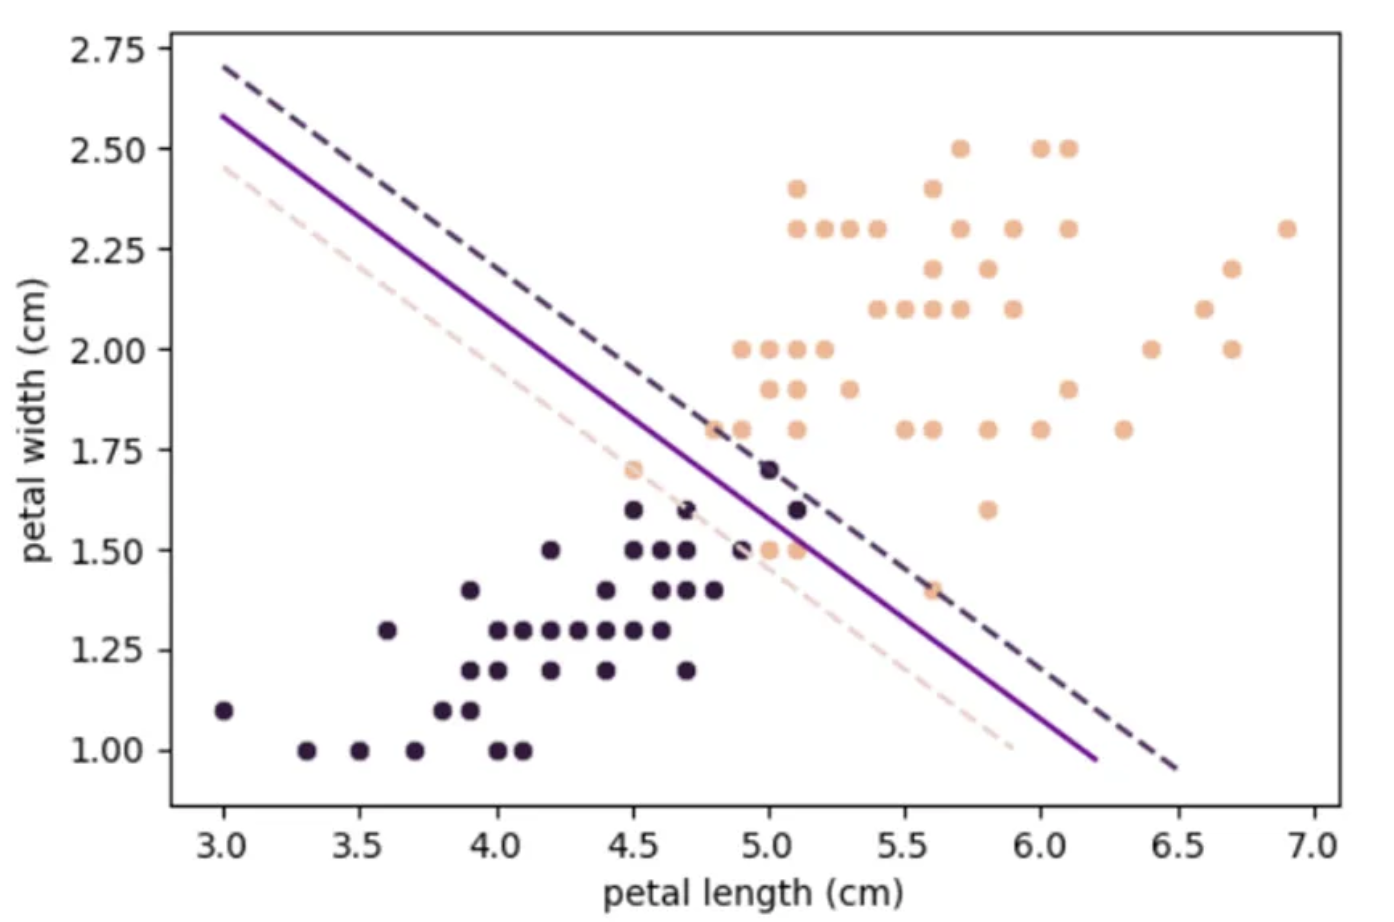

**Soft margins** are implemented by introducing a slack variable for each data point, which allows the SVM to tolerate some degree of misclassification error. The amount of tolerance is controlled by a parameter called the regularization hyperparameter C, which determines how much weight should be given to minimizing classification errors versus maximizing the margin.

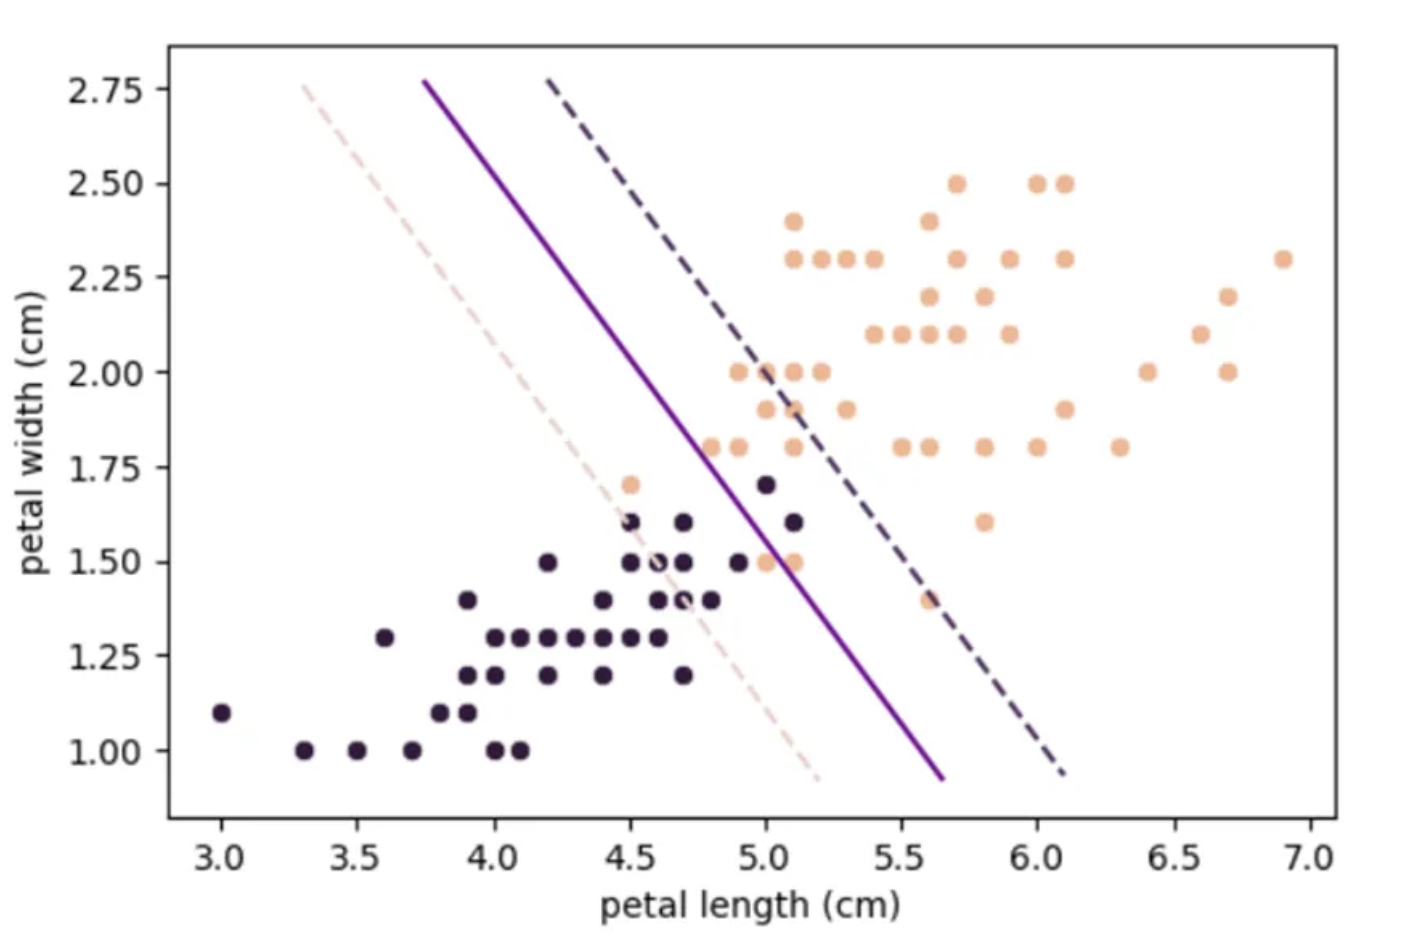

### Characteristics of SVM

- **Handles Non-Linear Data:** SVM can handle non-linear data using the “kernel trick,” which transforms the data into a higher-dimensional space where it becomes easier to separate.
- **Effective in High Dimensions:** SVM works well even when the number of features (dimensions) is much larger than the number of samples, making it suitable for complex datasets.
- **Robust to Overfitting:** By focusing on the points closest to the boundary (support vectors), SVM is less likely to overfit, especially in smaller datasets.


## 2. Mathematical Formulation of SVM


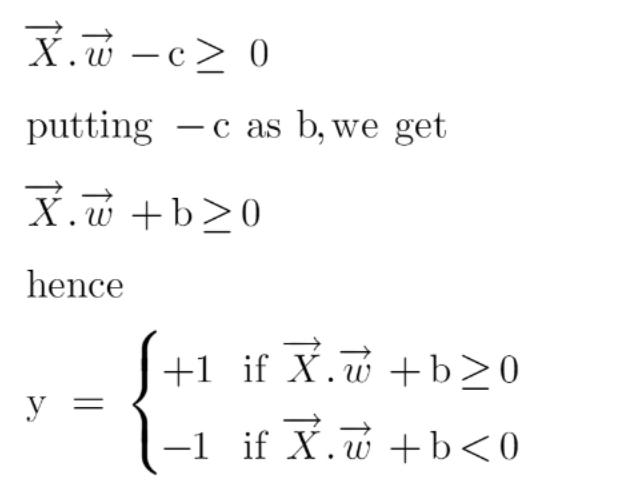
### Decision Function:
For a given dataset (X, y), SVM finds the optimal hyperplane defined by:

    f(X) = wX + b

where w is the weight vector and b is the bias term.

### Optimization Objective:
SVM aims to maximize the margin (distance between the separating hyperplane and the nearest data points, called support vectors):

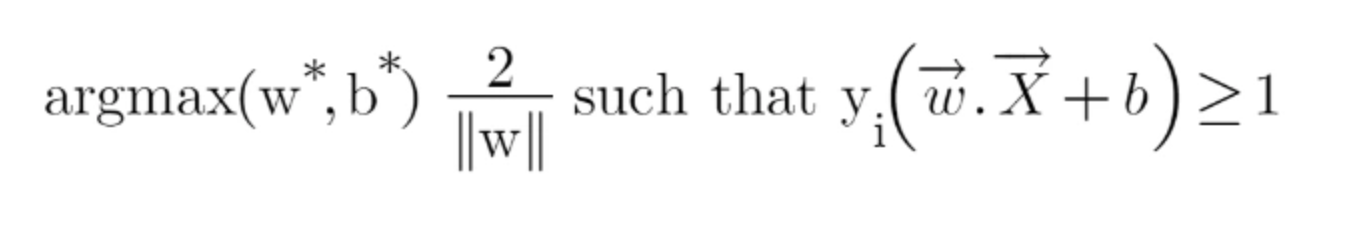



solved using Karush-Kuhn-Tucker (KKT) conditions. in Sklearn Sequential Minimal Optimization (SMO) algorithm is usd


## 3. SVM Kernels and When to Use Them


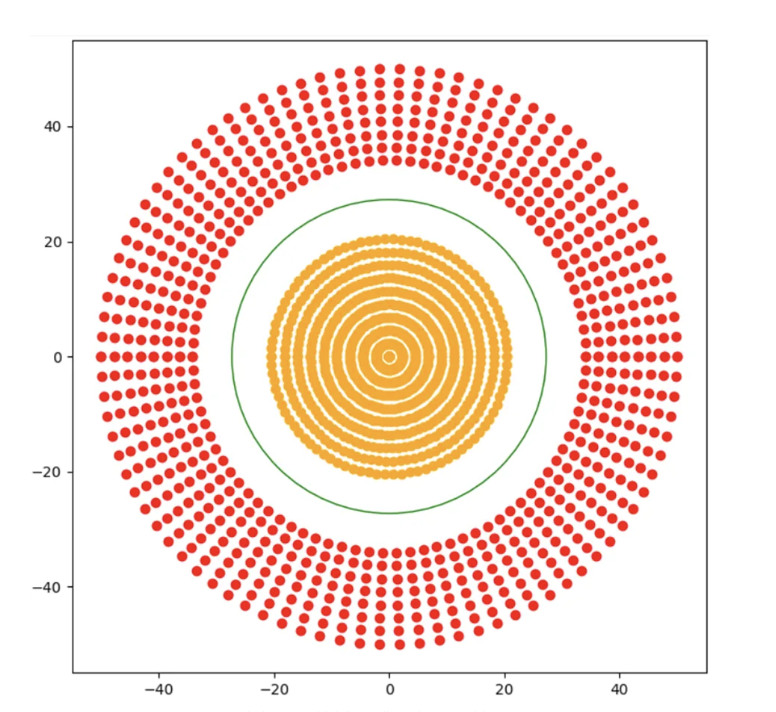

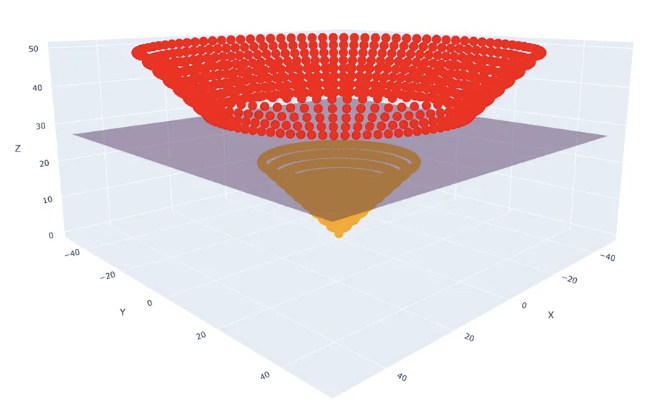


### What are Kernels and Why Do We Need Kernel Tricks?
Kernels are functions that transform input data into higher-dimensional space where a linear separator can be found. Many real-world problems involve data that is not linearly separable in its original feature space. Kernel tricks help us map this data into a higher dimension where a linear hyperplane can be used for classification, without explicitly computing the transformation.

### Linear Kernel:
Used when data is linearly separable.
    K(x, y) = x . y

### Polynomial Kernel:
Useful for capturing non-linear relationships.
    K(x, y) = (x . y + c)^d

### Radial Basis Function (RBF) Kernel:
Widely used for non-linear classification.
    K(x, y) = exp(-gamma * ||x - y||^2)

### Sigmoid Kernel:
Used for neural network-like behavior.
    K(x, y) = tanh(alpha * x . y + c)


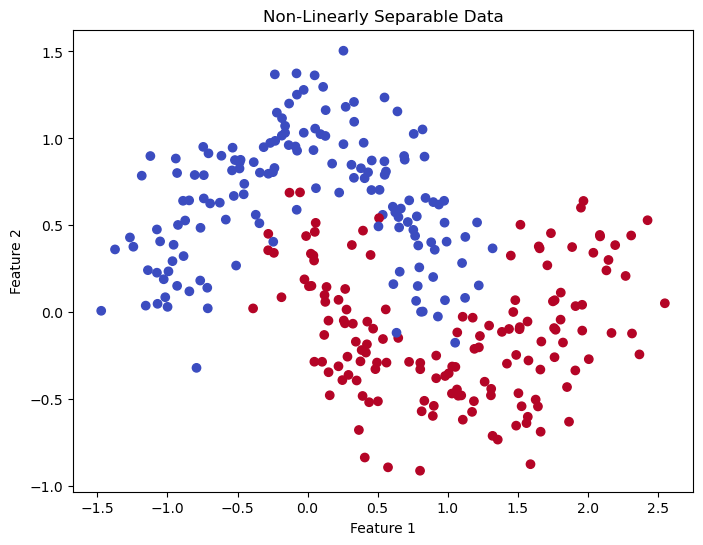

In [1]:
# Visualizing the Kernel Trick
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from mpl_toolkits.mplot3d import Axes3D

# Generating a non-linear dataset
X, y = make_moons(n_samples=300, noise=0.2, random_state=42)

# Plot the original data
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Non-Linearly Separable Data")
plt.show()


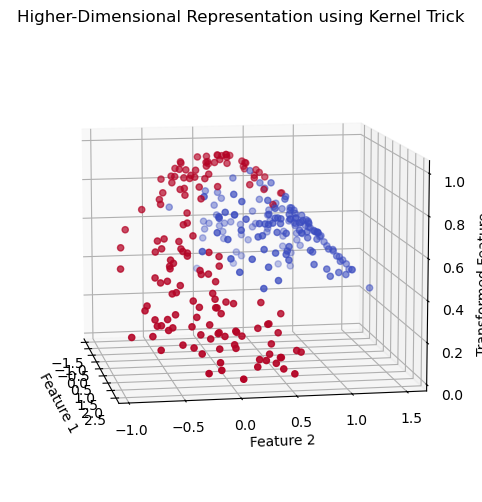

In [6]:
# Transforming data using RBF kernel
import numpy as np

X_transformed = np.exp(-0.5 * (X[:,0]**2 + X[:,1]**2))

# Visualizing data in higher dimensions
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X_transformed, c=y, cmap='coolwarm')
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Transformed Feature")
ax.set_title("Higher-Dimensional Representation using Kernel Trick")
ax.view_init(elev=10, azim=-10)  # Adjusting the orientation

plt.show()

# # Adding a hyperplane approximation
# xx, yy = np.meshgrid(np.linspace(-1.5, 2.5, 50), np.linspace(-1, 1.5, 50))
# zz = np.exp(-0.5 * (xx**2 + yy**2))
# ax.plot_surface(xx, yy, zz, alpha=0.3, color='gray')


## 4. Implementing SVM in Scikit-Learn


In [3]:
# Generate synthetic dataset
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=5, random_state=42)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [9]:
# Training SVM model with RBF kernel
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', C=2.0, gamma='scale')
svm_model.fit(X_train, y_train)

SVC(C=2.0, probability=True)

In [10]:
svm_model.get_params()

{'C': 2.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [11]:
# Predictions
y_pred = svm_model.predict(X_test)

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


NameError: name 'accuracy_score' is not defined

## 5. Hyperparameters of SVM
"""
- `C`: Regularization parameter (higher values make a stricter decision boundary)
- `kernel`: Specifies the type of kernel function (linear, poly, rbf, sigmoid)
- `degree`: Degree of polynomial kernel (used when kernel='poly')
- `gamma`: Kernel coefficient (used for 'rbf' and 'poly')
- `coef0`: Independent term in 'poly' and 'sigmoid' kernels
- `max_iter`: Maximum number of iterations
"""

## 6. Hyperparameter Tuning with Grid Search

In [6]:
from sklearn.model_selection import GridSearchCV

In [37]:
# Defining parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Performing grid search
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)
best_model = grid_search.best_estimator_

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.8700000000000001


## 7. Real-World Example Using Iris Dataset


In [42]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_socre

param_grid = {
    'C': [0.1, 1, 2, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Load iris dataset
data = load_iris()
X, y = data.data, data.target

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training SVM model

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

svm_model = SVC(kernel='poly', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = svm_model.predict(X_test)
print("Iris Dataset Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Iris Dataset Accuracy: 0.9666666666666667
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
data.target_names

In [ ]:
cm = confusion_matrix(y_test, y_pred))

# import matplotlib.pyplot as plt
# from sklearn.metrics import plot_confusion_matrix
# import seaborn as sns

# plt.figure(figsize=(10,8))
# plot_confusion_matrix(svm, x_test, y_text)


plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, xtricklabels=data.target_names,  ytricklabels=data.target_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Lable")
plt.title("Confusion matrix for iris classification")
plt.show()

In [ ]:
import pickle

In [ ]:
iris_classifier_model = (svm_model, scaler)

In [ ]:
model_filename = "iris_classifier_model.pkl"
with open(model_filename, 'wb') as f:
    pickle.dump(iris_classifier_model, f)

In [ ]:
with open("iris_classifier_model.pkl", 'rb') as f:
    loaded_model = pickle.load(f)

In [ ]:
svm_model, scaler = loaded_model

In [1]:
svm_model.predict(np.array([[4, 5, 6, 7]])

SyntaxError: incomplete input (1973528266.py, line 1)